In [1]:
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

一个小型的CNN：

In [2]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 多维输入一维化
model.add(layers.Flatten())  # 常在卷积层到全连接层的过渡，不影响batch的大小
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [8]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
# Transform the data
train_images = train_images.reshape((60000, 28, 28, 1))
# train_images = train_images.reshape((60000, 28, 28, -1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [14]:
# Transform the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
train_labels.shape

(60000, 10)

In [16]:
# compile
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [17]:
# fit
model.fit(train_images, train_labels, batch_size=64, epochs=5, verbose=2)

Epoch 1/5
 - 13s - loss: 0.1679 - acc: 0.9476
Epoch 2/5
 - 7s - loss: 0.0449 - acc: 0.9858
Epoch 3/5
 - 7s - loss: 0.0308 - acc: 0.9902
Epoch 4/5
 - 7s - loss: 0.0237 - acc: 0.9926
Epoch 5/5
 - 7s - loss: 0.0179 - acc: 0.9945


In [18]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 73us/step


0.9913

In [19]:
import os, shutil

In [20]:
# 原始数据的路径
original_dataset_dir = '/home/bingli/Downloads/kaggle_original_data'

# 存储较小的数据集
base_dir = '/home/bingli/Downloads/cats_and_dogs_small'
os.mkdir(base_dir)

# 划分数据集(目录)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 训练集
train_cats_dir = os.path.join(train_dir, 'cats')  # cats
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')  # dogs
os.mkdir(train_dogs_dir)

# 验证集
validation_cats_dir = os.path.join(validation_dir, 'cats')  # cats
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # dogs
os.mkdir(validation_dogs_dir)

# 测试集
test_cats_dir = os.path.join(test_dir, 'cats')  # cats
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')  # dogs
os.mkdir(test_dogs_dir)

# First 1000 cat images as training
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    # 将src中的内容复制到dst
    shutil.copyfile(src, dst)

# Next 500 as validation
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    # 将src中的内容复制到dst
    shutil.copyfile(src, dst)

# Next 500 as test
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    # 将src中的内容复制到dst
    shutil.copyfile(src, dst)

# First 1000 dog images as training
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    # 将src中的内容复制到dst
    shutil.copyfile(src, dst)

# Next 500 as validation
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    # 将src中的内容复制到dst
    shutil.copyfile(src, dst)

# Next 500 as test
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    # 将src中的内容复制到dst
    shutil.copyfile(src, dst)

**数据预处理**：

在将数据输入到神经网络之前，应将数据格式化为经过预处理的浮点数张量。

现数据以JPEG的格式保存在硬盘中，所有数据预处理步骤为：
1. 读取图像文件
2. 将JPEG文件解码为RGB像素网格
3. 将这些像素网格转换为浮点数张量
4. 将像素值（0-255）缩放到[0, 1]区间（神经网络喜欢处理较小的输入值）

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# 缩放数据到0-1间
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # 目标目录
    train_dir,
    # 所有image resize到150x150
    target_size=(150, 150),
    batch_size=20,
    # 因为使用binary_crossentropy，所以需要binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [23]:
# 构建网络
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [26]:
# Compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',   # 二分类
              metrics=['acc'])

使用`fit_generator`方法来拟合。

In [28]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 130ms/step - loss: 0.6434 - acc: 0.6255 - val_loss: 0.6738 - val_acc: 0.5920
Epoch 2/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6031 - acc: 0.6825 - val_loss: 0.6404 - val_acc: 0.6240
Epoch 3/30
100/100 [==============================] - 12s 123ms/step - loss: 0.5717 - acc: 0.7095 - val_loss: 0.5885 - val_acc: 0.6960
Epoch 4/30
100/100 [==============================] - 12s 125ms/step - loss: 0.5293 - acc: 0.7275 - val_loss: 0.6032 - val_acc: 0.6880
Epoch 5/30
100/100 [==============================] - 13s 128ms/step - loss: 0.5080 - acc: 0.7375 - val_loss: 0.6053 - val_acc: 0.7050
Epoch 6/30
100/100 [==============================] - 14s 137ms/step - loss: 0.4649 - acc: 0.7765 - val_loss: 0.5937 - val_acc: 0.7040
Epoch 7/30
100/100 [==============================] - 14s 136ms/step - loss: 0.4154 - acc: 0.8210 - val_loss: 0.6426 - val_acc: 0.7160
Epoch 8/30
100/100 [==============================] - 1

In [30]:
# Save the model
model.save("cats_and_dogs_samll_1.h5")

In [31]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

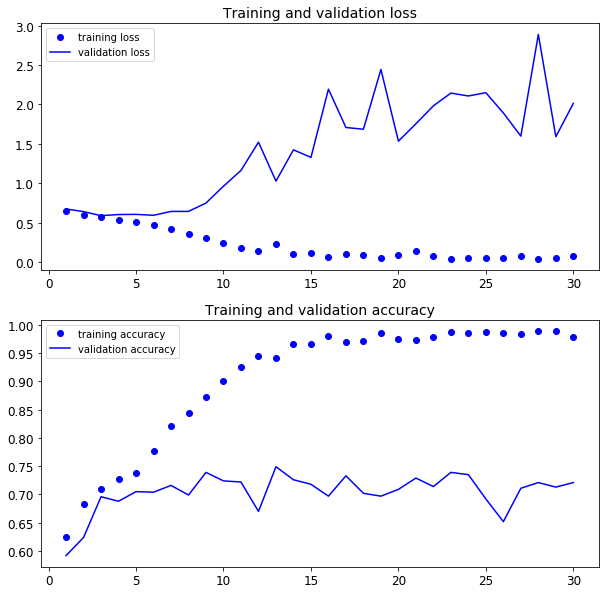

In [43]:
training_acc = history.history['acc']    # training acc
val_acc = history.history['val_acc']     # validation acc
training_loss = history.history['loss']  # training loss
val_loss = history.history['val_loss']   # validation loss

epochs = range(1, len(training_acc) + 1)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].plot(epochs, training_loss, 'bo', label='training loss')
axes[0].plot(epochs, val_loss, 'b', label='validation loss')
axes[0].set_title("Training and validation loss", fontsize=14)
axes[0].legend(loc='best')

axes[1].plot(epochs, training_acc, 'bo', label='training accuracy')
axes[1].plot(epochs, val_acc, 'b', label='validation accuracy')
axes[1].set_title("Training and validation accuracy", fontsize=14)
axes[1].legend(loc='best')

plt.show()

> **过拟合!**训练精度随着时间线性增加，直到100%，而验证精度则停留在70%左右。验证损失仅在5轮后就达到最小值，然后增大，而训练损失则一直现行下降，直到接近于0。

一种针对计算机视觉领域的降低过拟合的方法，在深度学习模型处理图像时几乎都会用到这种方法，是**数据增强（data augmentation）**。

**数据增强（data augmentation）**是从现有的样本中生成更多的训练数据。**方法**是利用多种能够生成可信图像的随机变换来增加样本。**目标**是在训练时不会两次查看完全相同的图像。

使用`keras.preprocessing.image.ImageDataGenerator`来设置数据增强。

In [44]:
datagen = ImageDataGenerator(
    rotation_range=40,       # 随机旋转40度
    width_shift_range=0.2,   # 图像在水平方向上平移的范围
    height_shift_range=0.2,  
    shear_range=0.2,   # 随机错切变换的角度
    zoom_range=0.2,    # 图像随机缩放的范围
    horizontal_flip=True,    # 随机将一半图像水平翻转 
    fill_mode='nearest')

(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


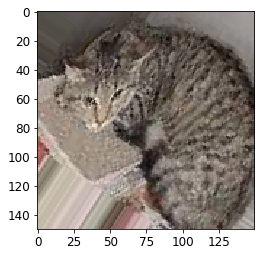

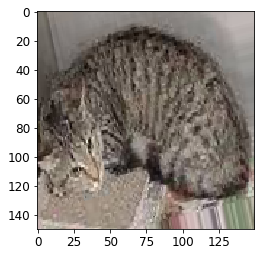

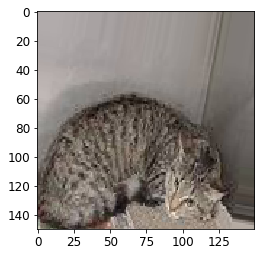

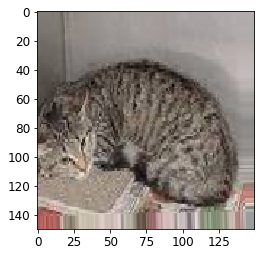

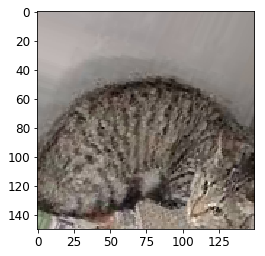

In [67]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname)
          for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]  # 选择一张图像进行增强
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Converts it to a NumPy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# 生成随机变换后的图像批量
# 循环是无限的，需要在某个时刻终止
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    print(batch.shape)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break
plt.show()

> 使用这种数据增强来训练一个新网络，那么网络将不会两次看到同样的输入。但网络看到的输入仍是高度相关的，因为这些输入都来自于少量的原始图像。**无法生成新图像，只能混合现有信息**。

**数据增强可能无法完全消除过拟合。为进一步降低过拟合，还需要向模型中添加一个Dropout层，添加到密集连接分类器之前。**

**定义一个包含Dropout层的新CNN：**

In [68]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
# Add a dropout layer
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [70]:
# Compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [73]:
# Transform the data(增强训练数据集)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [75]:
# Fit the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=0)

In [80]:
model.save('cats_and_dogs_small_2.h5')

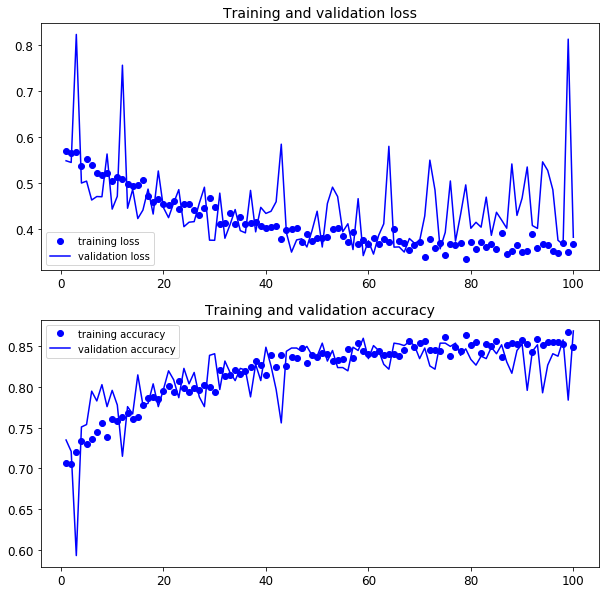

In [81]:
training_acc = history.history['acc']    # training acc
val_acc = history.history['val_acc']     # validation acc
training_loss = history.history['loss']  # training loss
val_loss = history.history['val_loss']   # validation loss

epochs = range(1, len(training_acc) + 1)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].plot(epochs, training_loss, 'bo', label='training loss')
axes[0].plot(epochs, val_loss, 'b', label='validation loss')
axes[0].set_title("Training and validation loss", fontsize=14)
axes[0].legend(loc='best')

axes[1].plot(epochs, training_acc, 'bo', label='training accuracy')
axes[1].plot(epochs, val_acc, 'b', label='validation accuracy')
axes[1].set_title("Training and validation accuracy", fontsize=14)
axes[1].legend(loc='best')

plt.show()

> 模型不再过拟合：训练精度仅仅跟随着验证曲线。